<a href="https://colab.research.google.com/github/khushbooekhande/DrugRecommendationSystem/blob/master/DrugReview_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:

# reading both test and train dataset data

data1 = pd.read_csv('drive/My Drive/255_Project/DataSet/DrugReview_Dataset1.csv')
data2 = pd.read_csv('drive/My Drive/255_Project/DataSet/DrugReview_Dataset2.csv')

In [66]:
data1.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [67]:
data2.head()

,Unnamed: 0,Unnamed: 0.1,drugName,condition,review,rating,date,usefulCount
0,0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4


In [0]:
#test data has one extra column. Drop it as it is just serial number
data2 = data2.drop(['Unnamed: 0'],axis=1)

In [69]:
# getting the shapes
print("Shape of train :", data1.shape)
print("Shape of test :", data2.shape)

Shape of train : (161297, 7)
Shape of test : (53766, 7)


In [70]:
#Rename column in test data
data2.columns = ['uniqueID','drugName','condition','review','rating','date','usefulCount'] 

# combine both datasets for better analysis

data = pd.concat([data1, data2])
data.shape

(215063, 7)

In [71]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,27-Nov-16,37


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   uniqueID     215063 non-null  int64  
 1   drugName     215063 non-null  object 
 2   condition    213869 non-null  object 
 3   review       215063 non-null  object 
 4   rating       215063 non-null  float64
 5   date         215063 non-null  object 
 6   usefulCount  215063 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 13.1+ MB


In [73]:
data.describe()

,uniqueID,rating,usefulCount
count,215063.000000,215063.000000,215063.000000
mean,116039.364814,6.990008,28.001004
std,67007.913366,3.275554,36.346069
min,0.000000,1.000000,0.000000
25%,58115.500000,5.000000,6.000000
50%,115867.000000,8.000000,16.000000
75%,173963.500000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [74]:
print(data['drugName'].unique(),"\t",data['drugName'].nunique())
print('____________________________________________________')
print(data['condition'].unique(),"\t",data['condition'].nunique())

['Valsartan' 'Guanfacine' 'Lybrel' ... 'Pegaptanib' 'FiberCon'
 'Allergy DN PE'] 	 3671
____________________________________________________
['Left Ventricular Dysfunction' 'ADHD' 'Birth Control' 'Opiate Dependence'
 'Benign Prostatic Hyperplasia' 'Emergency Contraception'
 'Bipolar Disorde' 'Epilepsy' 'Migraine Prevention' 'Depression'
 "Crohn's Disease" 'Cough' 'Obesity' 'Urinary Tract Infection'
 'ibromyalgia' 'Chronic Myelogenous Leukemia' 'HIV Infection' 'Insomnia'
 'Rheumatoid Arthritis' 'Vaginal Yeast Infection' 'Chlamydia Infection'
 'Hirsutism' 'Panic Disorde' 'Migraine' nan 'Pain'
 'Irritable Bowel Syndrome' 'Osteoarthritis' 'Constipation'
 'Bowel Preparation' 'Psychosis' 'Muscle Spasm' 'Hepatitis C'
 'Overactive Bladde' 'Diabetes, Type 2' 'Asthma, Maintenance'
 'Non-Small Cell Lung Cance' 'Schizophrenia' 'Dysuria' 'Smoking Cessation'
 'Anxiety' 'Acne' 'emale Infertility' 'Constipation, Acute'
 'Constipation, Drug Induced' 'Erectile Dysfunction'
 'Trigeminal Neuralgia' 'Under

In [75]:
data.isnull().any()

uniqueID       False
drugName       False
condition       True
review         False
rating         False
date           False
usefulCount    False
dtype: bool

In [76]:
data['condition'].isnull().sum()

1194

In [77]:
data.dropna(axis = 'rows')
data['condition'].isnull().sum()

1194

In [78]:
# Changing the format of date column.
data['date'] = pd.to_datetime(data['date'])
data

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,2012-05-20,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,2010-04-27,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,2009-12-14,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,2015-11-03,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,2016-11-27,37
...,...,...,...,...,...,...,...
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10.0,2014-09-13,43
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9.0,2016-10-08,11
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8.0,2010-11-15,7
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1.0,2011-11-28,20


# **Data** **Visualization**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2079: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



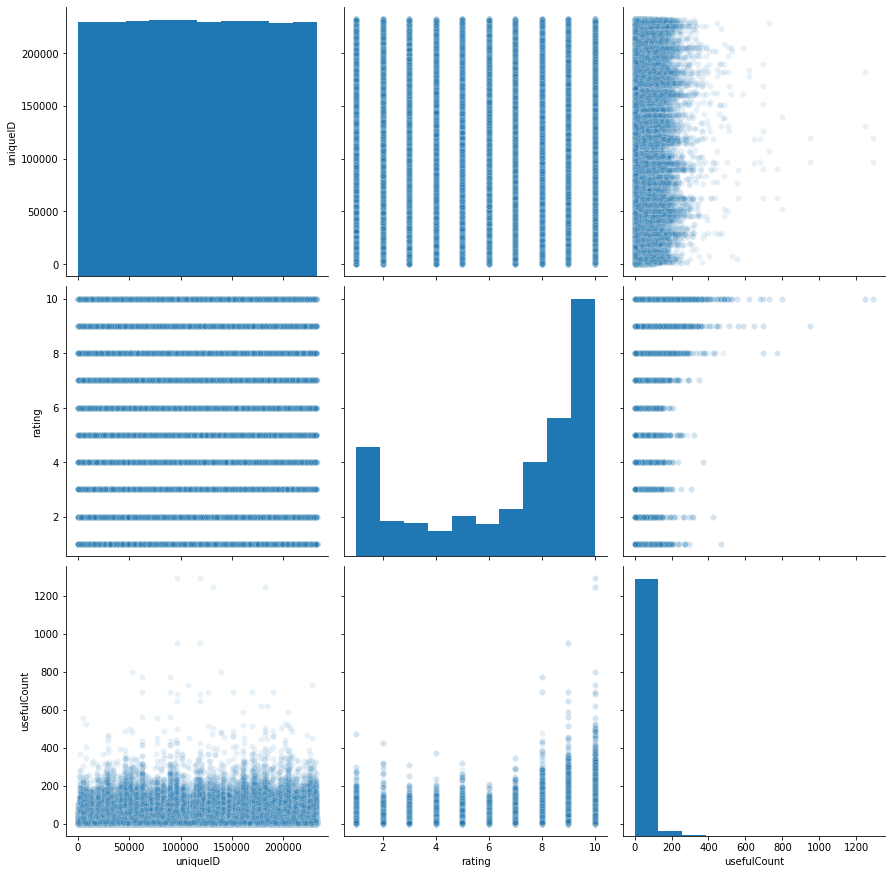

In [79]:
# Pairlpot of the data
sns.pairplot(data, plot_kws={'alpha':0.1},size=4)

# **#Total comments that are posted everyday**

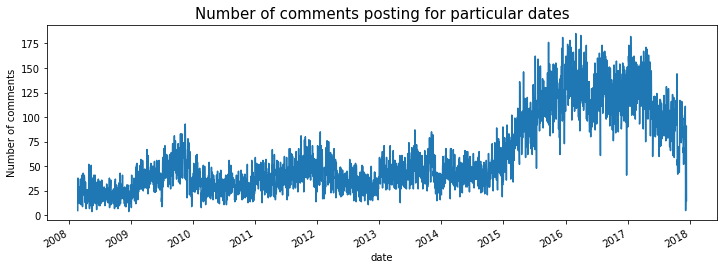

In [80]:
data.groupby('date').size().plot(figsize=(12,4))
plt.ylabel('Number of comments')
plt.title("Number of comments posting for particular dates",fontsize=15)
plt.savefig("NumComments_date.png")

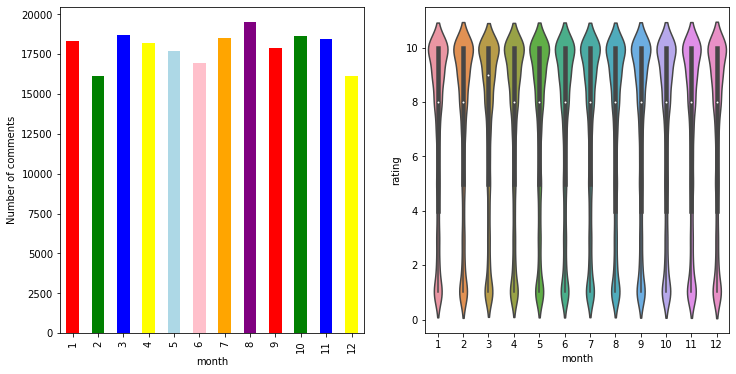

In [81]:
# Number of comments per month

data['month'] = data['date'].apply(lambda x: x.month)
color = ['red', 'green', 'blue', 'yellow', 'lightblue', 'pink', 'orange', 'purple']
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
data.groupby('month').size().plot(kind='bar', color = color)
plt.ylabel('Number of comments')

plt.subplot(1, 2, 2)
sns.violinplot(data=data,x='month',y='rating')

**# Number of comments for each condition**

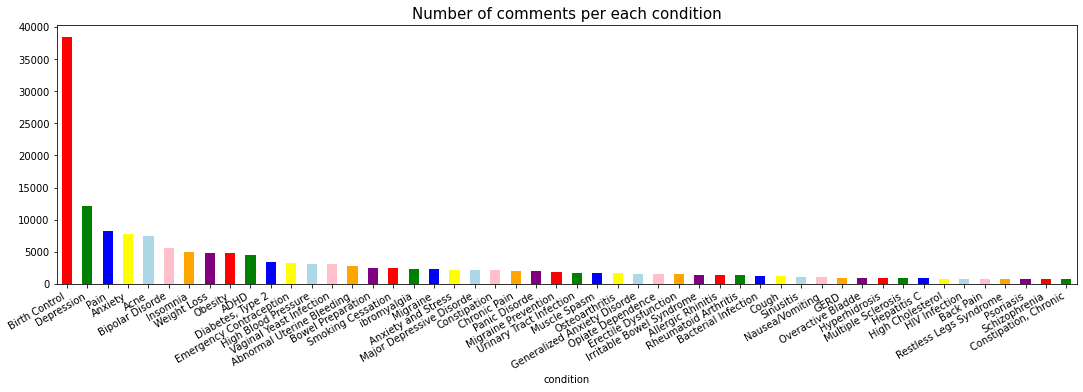

In [82]:
d1 = pd.DataFrame(data.groupby(['condition','month']).size()).reset_index()

d2 = d1.pivot_table(index='condition',columns='month',values=0)

fig = plt.figure(figsize=(15,5))
d2.sum(1).sort_values(ascending=False).iloc[:50].plot(kind='bar', color=color)
plt.title("Number of comments per each condition",fontsize=15)
plt.tight_layout()
fig.autofmt_xdate(bottom=0.2, rotation=30, ha='right')
plt.xticks(fontsize=10)

plt.savefig("NumComments_Condition.png")

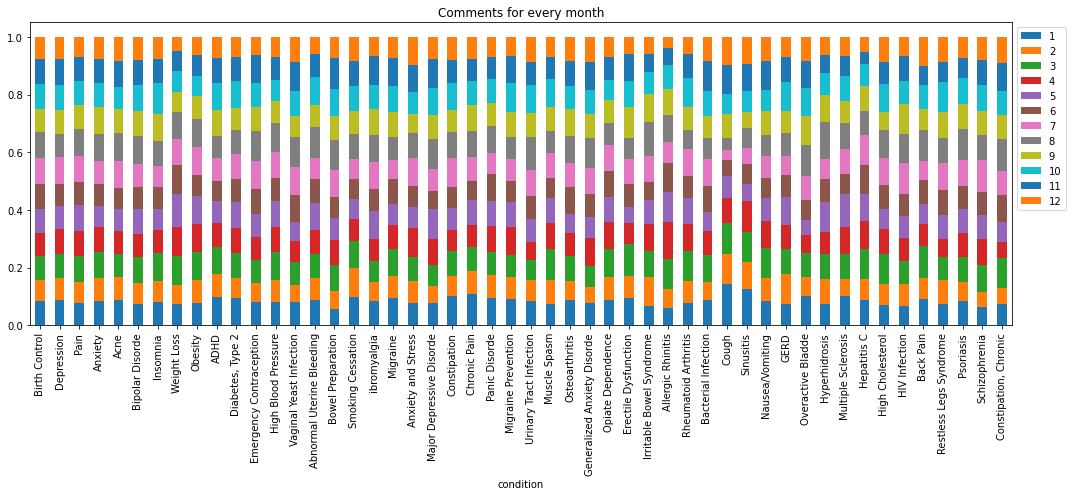

In [83]:
# Now let's plot the number of comments for each coniditon posted month wise

n = 50
n = d2.sum(1).sort_values(ascending=False).iloc[:n].index
n1 = d2.loc[n]
n2 = n1.div(n1.sum(1), axis=0)
n2.plot.bar(stacked=True, figsize=(15,7))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Comments for every month")
plt.tight_layout()
plt.savefig("CommentsMonth.png")